<a href="https://colab.research.google.com/github/AnhMcConnell/10-Applications-in-Python/blob/master/02_RNN_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [2]:
# CODE HERE
from google.colab import files
uploaded = files.upload()

Saving Frozen_Dessert_Production.csv to Frozen_Dessert_Production (5).csv


In [3]:
import io


In [4]:
df = pd.read_csv(io.BytesIO(uploaded['Frozen_Dessert_Production.csv']))

In [5]:
df.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [6]:
df = df.set_index('DATE')

In [7]:
df.head(2)

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605


**Task: Change the column name to Production**

In [8]:
#CODE HERE
df.rename(columns={'IPN31152N': 'Production'}, inplace=True)

In [9]:
df.head(2)

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605


**TASK: Plot out the time series**

<Figure size 864x576 with 0 Axes>

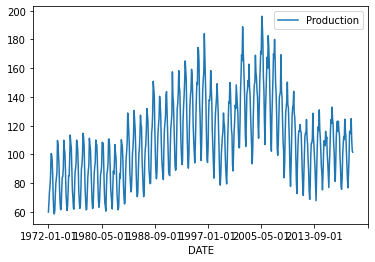

In [10]:
plt.figure(figsize=(12,8))

df.plot()

## Train Test Split

**TASK: Figure out the length of the data set**

In [11]:
#CODE HERE
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [12]:
#CODE HERE
train = len(df) - 18
train

555

In [13]:
test = len(df) - train
test

18

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [14]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [15]:
train_df = df.iloc[:train]

In [16]:
len(train_df)

555

In [17]:
test_df = df.iloc[train:]

In [18]:
len(test_df)

18

In [19]:
scaler.fit(train_df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [20]:
scaled_train = scaler.transform(train_df)

In [21]:
len(scaled_train)

555

In [22]:
scaled_test = scaler.transform(test_df)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [23]:
#CODE HERE
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`

In [25]:
length = 12
n_features = 1

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)


In [26]:
len(scaled_train)

555

In [27]:
len(generator)

543

In [28]:
X, y = generator[0]

In [29]:
X

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ]]])

In [30]:
y

array([[0.01774221]])

In [31]:
scaled_train

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [34]:
#n_features = 1

#model = Sequential()
#model.add(SimpleRNN(18, input_shape=(length, n_features)))

#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')

In [35]:
#model.summary()

In [36]:
# LSTM 

n_features = 1

model = Sequential()
model.add(LSTM(120, input_shape=(length, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120)               58560     
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 58,681
Trainable params: 58,681
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [38]:
# CODE HERE
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [39]:
#CODE HERE
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [40]:
# CODE HERE
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


543/543 [==============================] - 5s 7ms/step - loss: 0.0353 - val_loss: 0.0014
Epoch 2/20
543/543 [==============================] - 3s 5ms/step - loss: 0.0046 - val_loss: 0.0030
Epoch 3/20
543/543 [==============================] - 3s 5ms/step - loss: 0.0040 - val_loss: 0.0024


**TASK: Plot the history of the loss that occured during training.**

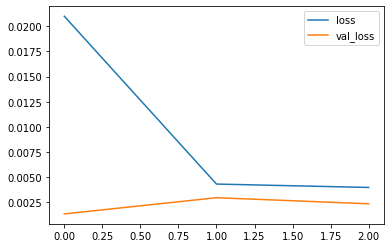

In [41]:
# CODE HERE
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [42]:
# CODE HERE
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test_df)):
  # get prediction 1 time stamp ahead ([0] is for grabbing just the number ins)
  current_pred = model.predict(current_batch)[0]
  # Store prediction
  test_predictions.append(current_pred)
  # Update batch to now include prediction and drop first value
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [43]:
true_predictions = scaler.inverse_transform(test_predictions)

In [44]:
test_df['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
test_df

,Production,Predictions
DATE,,
2018-04-01,112.4309,115.133422
2018-05-01,110.3544,121.289489
2018-06-01,124.5841,124.783516
2018-07-01,117.2215,121.998938
2018-08-01,112.6779,113.464969
2018-09-01,103.3118,99.394279
2018-10-01,92.1321,85.592444
2018-11-01,82.4347,75.987763
2018-12-01,76.7608,74.928785


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

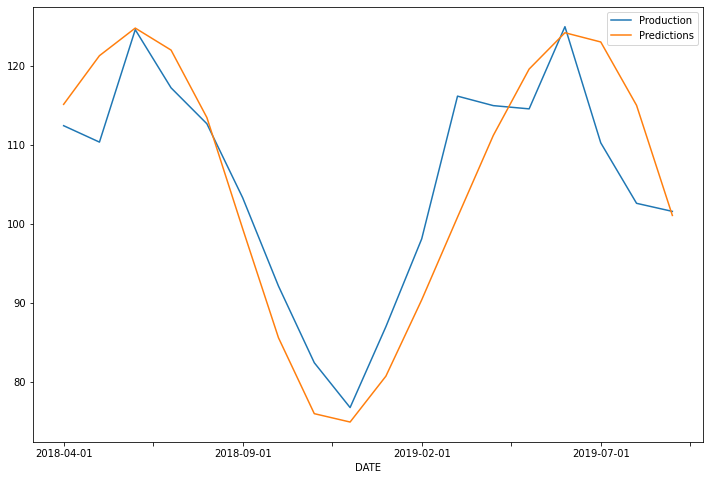

In [46]:
# CODE HERE
test_df.plot(figsize=(12,8))

**TASK: Calculate your RMSE.**

In [47]:
#CODE HERE
from sklearn.metrics import mean_squared_error


In [48]:
np.sqrt(mean_squared_error(test_df['Production'], test_df['Predictions']))

7.2410355234056185

# Try to get root mean squared error as small as possible , 0 is best.
+ Try to decrease the test set size, and give model LSTM more neurons (units size), and increase more patience (4)
+ There are a lot more methods to use to improve your model. Then double check with RMSE